In [ ]:
pip install palmerpenguins

**About data:**

Data holds size measurements, clutch observations, and blood isotope ratios for 344 adult penguins. Final classes of these penguins have been categorized into Adélie, Chinstrap, and Gentoo. 

In [ ]:
#importing packages
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats       

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.cluster import KMeans #kmeans clustering

from scipy.cluster.hierarchy import dendrogram, linkage #hierarchical clustering

from palmerpenguins import load_penguins #to load the penguin data

In [ ]:
#importing data into dataframe
df_peng = load_penguins()
df_peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [ ]:
#checking for na values 

df_peng.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [ ]:
#replacing na values for numerical attributes with column mean

df_peng['bill_length_mm'] = df_peng['bill_length_mm'].fillna(value = df_peng['bill_length_mm'].mean())
df_peng['bill_depth_mm'] = df_peng['bill_depth_mm'].fillna(value = df_peng['bill_depth_mm'].mean())
df_peng['flipper_length_mm'] = df_peng['flipper_length_mm'].fillna(value = df_peng['flipper_length_mm'].mean())
df_peng['body_mass_g'] = df_peng['body_mass_g'].fillna(value = df_peng['body_mass_g'].mean())


In [ ]:
#dropping na values in column 'sex'

df_peng.dropna(subset=['sex'],inplace=True)


In [ ]:
#one hot encoding for columns 'sex' and 'island'

dummy_sex = pd.get_dummies(df_peng['sex'])
df_peng = pd.merge(
    left=df_peng,
    right=dummy_sex,
    left_index=True,
    right_index=True,
)

dummy_island = pd.get_dummies(df_peng['island'])
df_peng = pd.merge(
    left=df_peng,
    right=dummy_island,
    left_index=True,
    right_index=True,
)

In [ ]:
#dropping columns 'year','sex' and 'island'

df_peng.drop(columns=['year','sex','island'],inplace=True)

In [ ]:
#data

df_peng.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,female,male,Biscoe,Dream,Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,0,1,0,0,1
1,Adelie,39.5,17.4,186.0,3800.0,1,0,0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,1,0,0,0,1
4,Adelie,36.7,19.3,193.0,3450.0,1,0,0,0,1
5,Adelie,39.3,20.6,190.0,3650.0,0,1,0,0,1


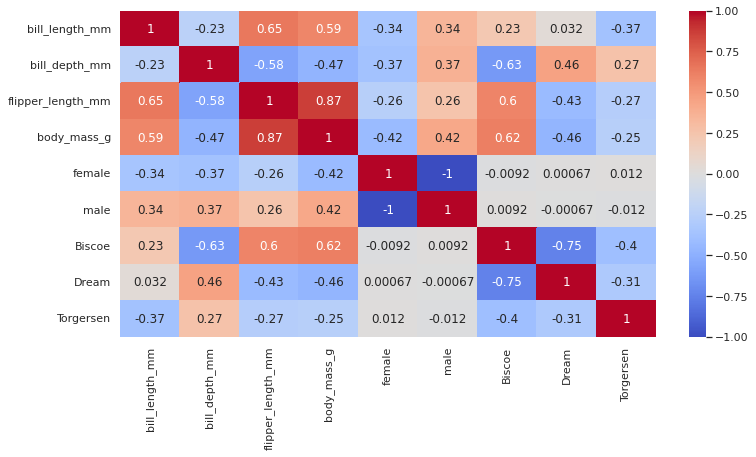

In [ ]:
#heatmap for visualizing correlation between attributes 

corr = df_peng.corr()
sns.set(rc={'figure.figsize':(12,6)})
sns.heatmap(corr, cmap='coolwarm', annot=True)

In [ ]:
#assigning x and y attributes

y = df_peng['species']
x=df_peng[['bill_depth_mm','flipper_length_mm','body_mass_g','Biscoe','Dream','Torgersen','female','male']]

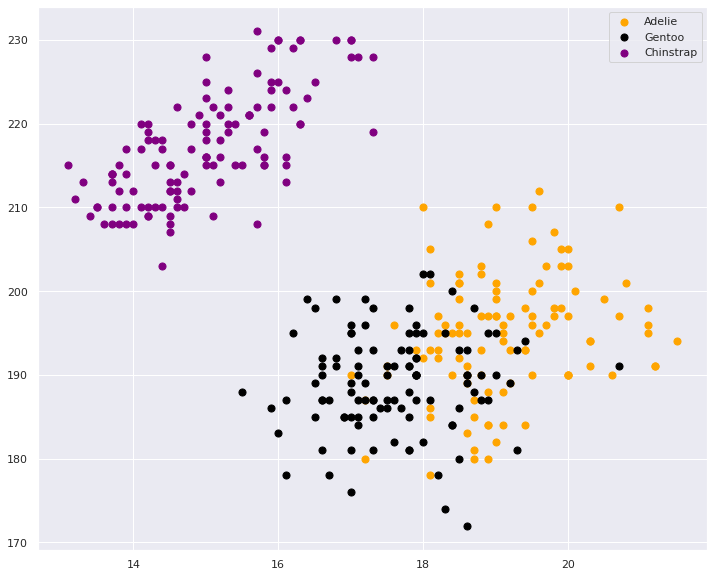

In [ ]:
#normalizing input data

scaler = StandardScaler()

#k-means model
k_mod = KMeans(n_clusters=3)

pipeline = make_pipeline (scaler, k_mod)

#using the pipeline object to fit and predict
pipeline.fit(x)
y_kmeans = pipeline.fit_predict(x)


#visualizing obtained clusters
x = np.array(x) 
sns.set(rc={'figure.figsize':(12,10)})
plt.scatter(x[y_kmeans   == 0, 0], x[y_kmeans == 0, 1],s = 50, c = 'orange', label = 'Adelie')
plt.scatter(x[y_kmeans   == 1, 0], x[y_kmeans == 1, 1],s = 50, c = 'black', label = 'Gentoo')
plt.scatter(x[y_kmeans   == 2, 0], x[y_kmeans == 2, 1],s = 50, c = 'purple', label = 'Chinstrap') 
plt.legend()
plt.show()

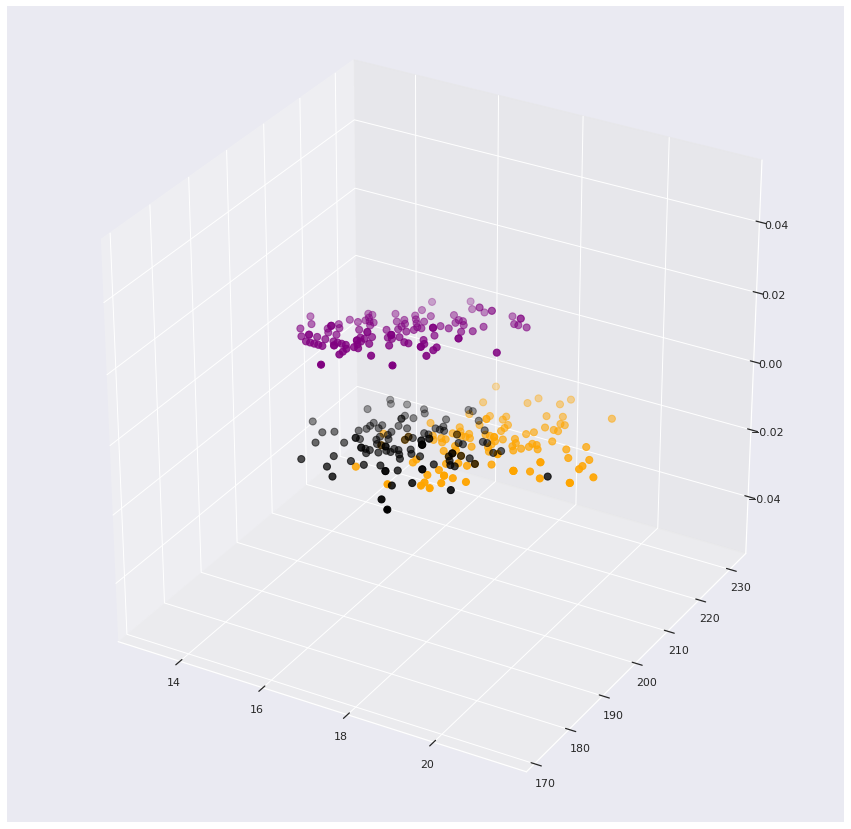

In [ ]:
#visulizing clusters in 3D
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans   == 0, 0], x[y_kmeans == 0, 1],s = 50, c = 'orange', label = 'Adelie')
plt.scatter(x[y_kmeans   == 1, 0], x[y_kmeans == 1, 1],s = 50, c = 'black', label = 'Gentoo')
plt.scatter(x[y_kmeans   == 2, 0], x[y_kmeans == 2, 1],s = 50, c = 'purple', label = 'Chinstrap') 